# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.shape

(110527, 14)

In [3]:
# check if any missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

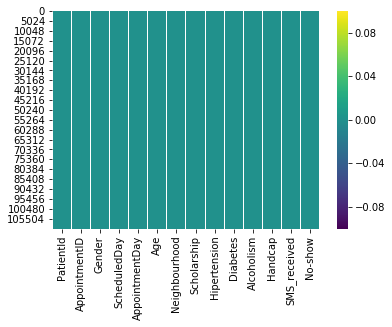

In [4]:
sns.heatmap(df.isnull(), cmap='viridis')

So there is no any NaN anywhere in the data

In [5]:
# check for doublications
df.duplicated().any()

False

The dataset has zero duplicates and zero null values.

# Data Cleaning

In [6]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

I do admit that it is possible to live 100 years but I would like to keep the age as real as possible so any ages more than 95 will be removed..

In [7]:
# clean Age
df = df[(df['Age'] > 0) & (df['Age'] < 95)]

In [8]:
# clean AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x : x.replace('T00:00:00Z', ''))
df['AppointmentDay'] = pd.to_datetime(df['ScheduledDay'])

In [9]:
# extract days & months from the appointments
df['AppointmentDays'] = df['AppointmentDay'].apply(lambda x : dt.datetime.strftime(x, '%A'))
df['AppointmentMonths'] = df['AppointmentDay'].apply(lambda x : dt.datetime.strftime(x, '%B'))

# Exploratory Data Analysis

In [10]:
# summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069170e+05,1.069170e+05,106917.000000,106917.000000,106917.00000,106917.000000,106917.000000,106917.000000,106917.000000
mean,1.472528e+14,5.675433e+06,38.277150,0.101097,0.20355,0.074198,0.031426,0.022831,0.323372
std,2.557886e+14,7.131281e+04,22.421586,0.301459,0.40264,0.262094,0.174468,0.163648,0.467766
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.173166e+12,5.640488e+06,19.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.169497e+13,5.680736e+06,38.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,9.432679e+13,5.725621e+06,56.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,94.000000,1.000000,1.00000,1.000000,1.000000,4.000000,1.000000


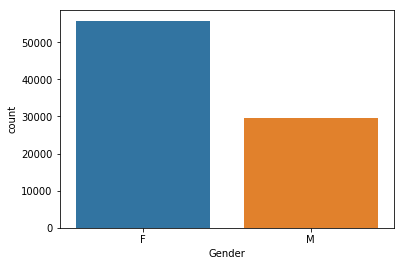

In [11]:
# who visits the doctor more often?
visits = df[df['No-show'] == 'No']
sns.countplot(x='Gender', data=visits)

In [12]:
# what is the proportion of male & female?
df['Gender'].value_counts(normalize = True)

F    0.655303
M    0.344697
Name: Gender, dtype: float64

(-1.1081895929596146,
 1.1003899806171245,
 -1.1089128497634797,
 1.1048870490533025)

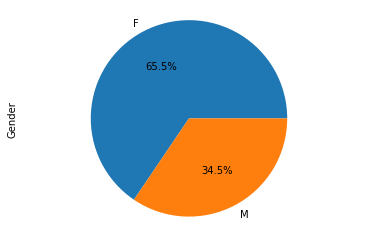

In [13]:
# visualise male vs female distribution
fig, pie = plt.subplots()
df['Gender'].value_counts(normalize = True).plot(kind='pie', autopct='%1.1f%%')
pie.axis('equal')

In [14]:
# what is the proportion of no-shows
df['No-show'].value_counts(normalize = True)

No     0.797347
Yes    0.202653
Name: No-show, dtype: float64

In [15]:
# no. of patients who miss their appointments
len(df[df['No-show'] == 'Yes'].index)

21667

In [16]:
# overall no-show percentage
# from __future__ import division
len(df[df['No-show'] == 'Yes'].index) / len(df.index)

0.2026525248557292

So the percent of patients who miss their appointments is about 20%

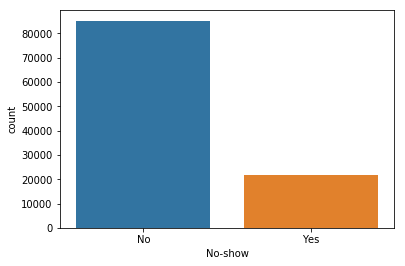

In [17]:
# visualise prcentage of no-shows
sns.countplot(x='No-show', data=df)

Above result shows that the rate of patients who vistit their doctors (about 80%) is more than that of those who miss their appointments.

C:\Users\i502043\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


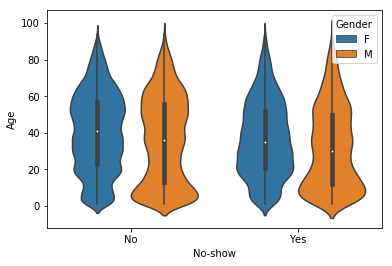

In [18]:
# male vs female age and its effect on showing?
sns.violinplot(df['No-show'], df['Age'], hue=df['Gender'])

In [ ]:
# what is the patient age distribution for no-shows versus shows?
df.groupby('No-show')['Age'].mean()

No-show
No     39.036305
Yes    35.290211
Name: Age, dtype: float64

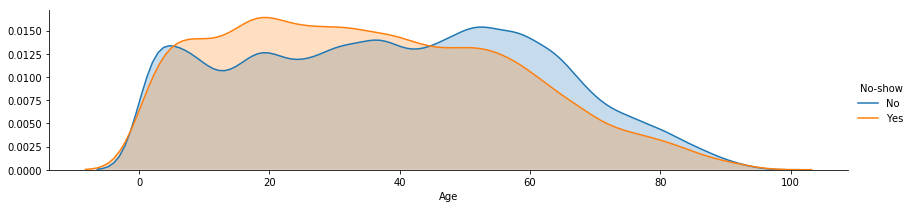

In [ ]:
# age distribution for show & no show
# use FacetGrid to plot multiple kdeplots on one plot
fig = sns.FacetGrid(df, hue='No-show', aspect=4)
# call FacetGrid.map() to use sns.kdeplot() to show age distribution
fig.map(sns.kdeplot, 'Age', shade=True)
fig.add_legend()

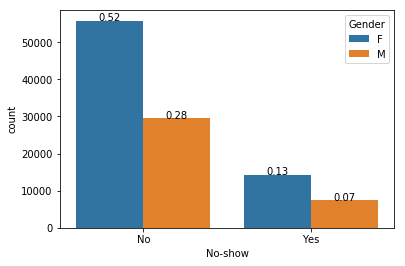

In [ ]:
# what is the proportion of missing the appointment whether the patient is male or female?
x = sns.countplot(x='No-show', hue='Gender', data=df)
# to plot the values over the labels
total = float(len(df))
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')

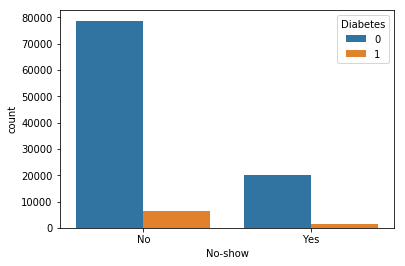

In [ ]:
# what is the relationship between no-show and diabetes?
sns.countplot(x='No-show', hue='Diabetes', data=df)

Text(0.5, 1.0, 'No-show vs Alcoholism')

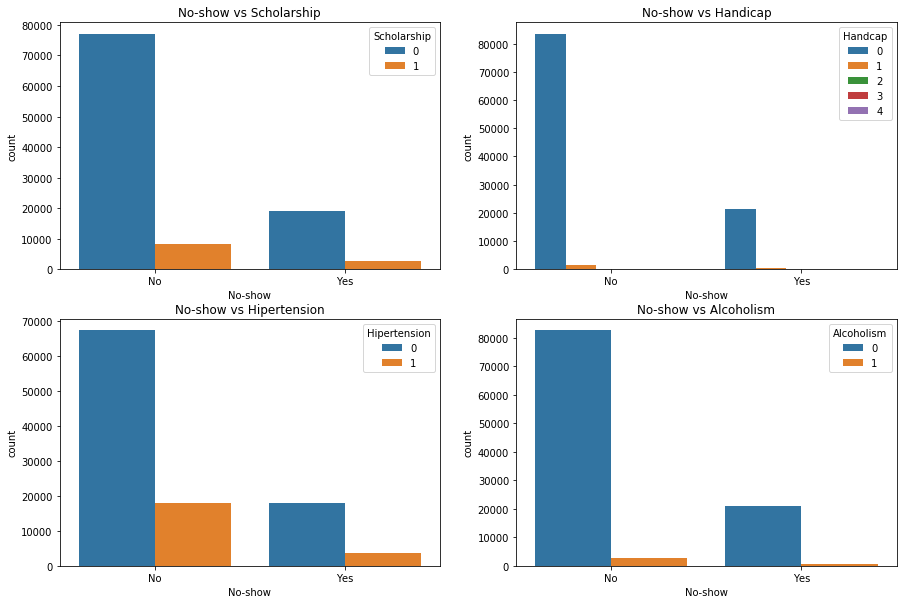

In [ ]:
# what is the relationship between no-show and each of scholarship, handicap, hipertension and alcoholism respectively?
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='No-show', hue='Scholarship', data=df, ax=ax[0][0]).set_title('No-show vs Scholarship')
sns.countplot(x='No-show', hue='Handcap', data=df, ax=ax[0][1]).set_title('No-show vs Handicap')
sns.countplot(x='No-show', hue='Hipertension', data=df, ax=ax[1][0]).set_title('No-show vs Hipertension')
sns.countplot(x='No-show', hue='Alcoholism', data=df, ax=ax[1][1]).set_title('No-show vs Alcoholism')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

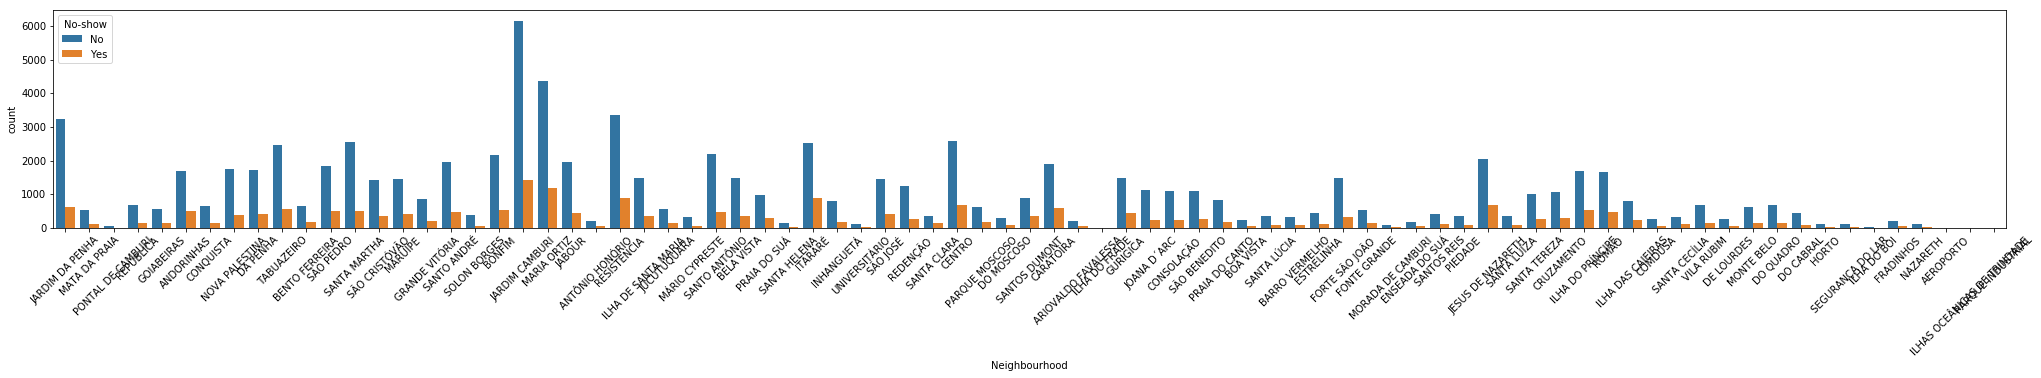

In [ ]:
# what is the relationship between neighbourhoods and the number of shows?
plt.figure(figsize=(35,4))
sns.countplot(x='Neighbourhood', hue='No-show', data=df)
plt.xticks(rotation=45)

In [ ]:
# which neighbourhoods have the highest number of shows?
shows = df[df['No-show'] == 'No']
shows.groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False).head(20)

Neighbourhood
JARDIM CAMBURI       6149
MARIA ORTIZ          4367
RESISTÊNCIA          3360
JARDIM DA PENHA      3220
CENTRO               2586
SANTA MARTHA         2547
ITARARÉ              2514
TABUAZEIRO           2465
SANTO ANTÔNIO        2195
BONFIM               2161
JESUS DE NAZARETH    2043
SANTO ANDRÉ          1971
JABOUR               1963
CARATOÍRA            1902
SÃO PEDRO            1848
NOVA PALESTINA       1763
DA PENHA             1732
ILHA DO PRÍNCIPE     1697
ANDORINHAS           1685
ROMÃO                1660
Name: No-show, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 <a list of 80 Text xticklabel objects>)

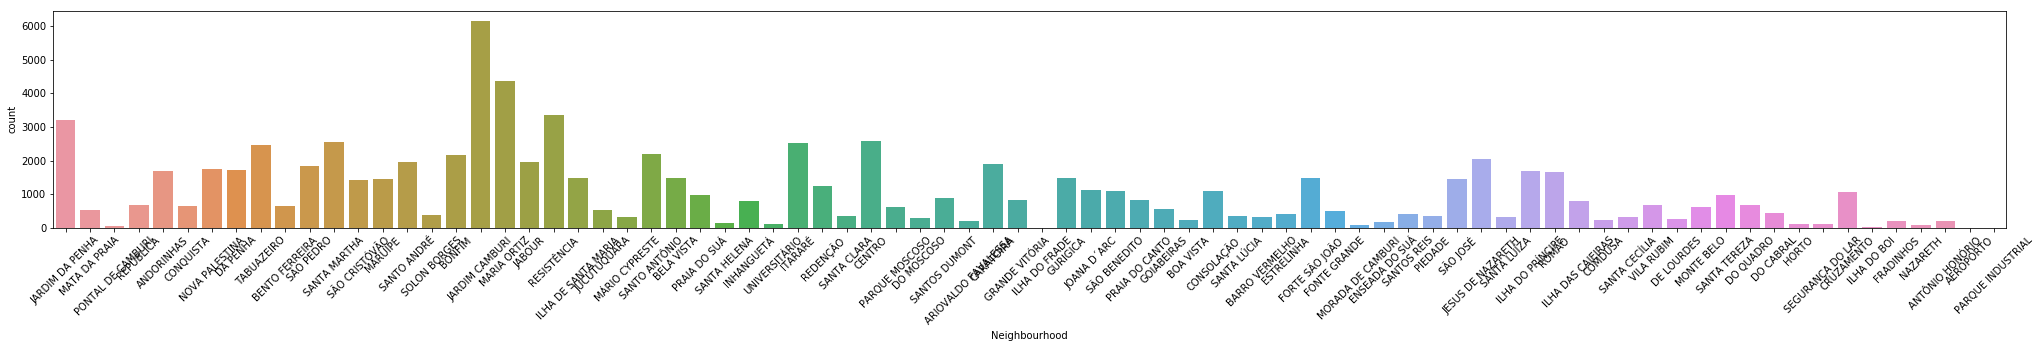

In [ ]:
# visualise neighbourhoods vs shows
plt.figure(figsize=(35,4))
sns.countplot(x='Neighbourhood', data=shows)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

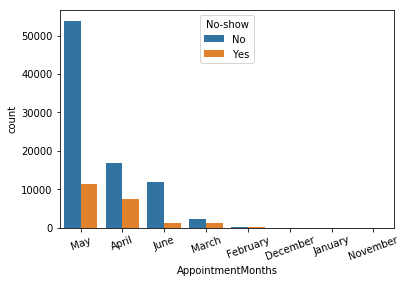

In [ ]:
# in which month most patients miss their appointments
sns.countplot(x='AppointmentMonths', hue='No-show', data=df, order = df['AppointmentMonths'].value_counts().index)
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

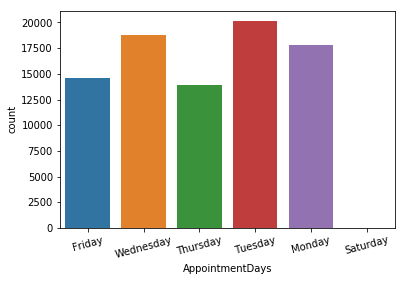

In [ ]:
# in which day the patients visit their doctors most frequently?
sns.countplot(x='AppointmentDays', data=visits)
plt.xticks(rotation=15)

In [ ]:
# is there specific weekday when most patients miss their appointments?
miss = df[df['No-show'] == 'Yes']
miss.groupby('AppointmentDays')['No-show'].count().sort_values(ascending=False)

AppointmentDays
Tuesday      5116
Wednesday    4755
Monday       4413
Friday       3794
Thursday     3588
Saturday        1
Name: No-show, dtype: int64

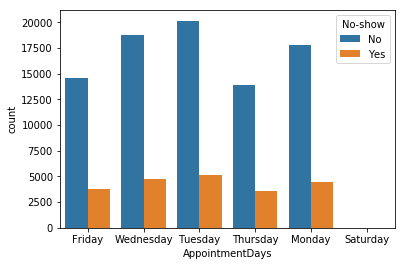

In [ ]:
# what is the weekly no-show count
sns.countplot(x='AppointmentDays', hue='No-show', data=df)

Appointments are more likely to be missed on Tuesdays, and less likely on Saturdays..

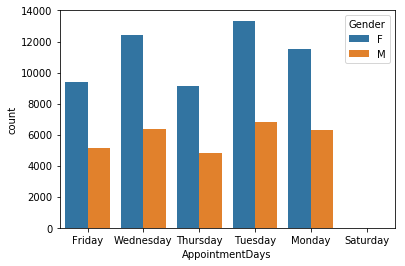

In [ ]:
# do men and women visit the doctor on the same days?
sns.countplot(x='AppointmentDays', hue='Gender', data=visits)

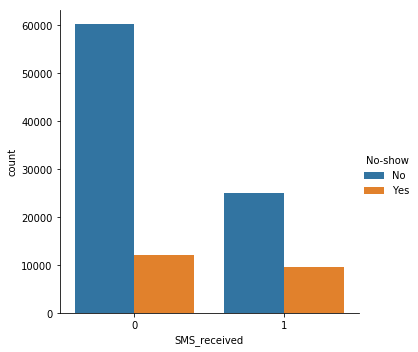

In [ ]:
# how likely patients comes to their scheduled appointment if they have received a sms
sns.catplot('SMS_received', hue='No-show', data=df, kind='count')

About 70% of the patients don't receive SMS they don't miss their appointments and has even higher proportion than the ones who have received SMS

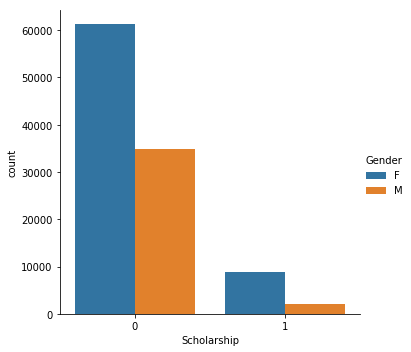

In [ ]:
# what is the proportion of patients who has received familia scholarship?
sns.catplot('Scholarship', hue='Gender', data=df, kind='count')

This shows 1% of patients have received Bolsa Familia Scholarship!

In [ ]:
# based on neighbourhood and scholarship, how showing-up is affected?
nbrhd_schlrshp_nshw = pd.DataFrame(df[['Neighbourhood','Scholarship','No-show']].groupby( ['Neighbourhood', 'No-show','Scholarship']).size().reset_index(name = 'Count'))
nbrhd_schlrshp_nshw.head(30)

,Neighbourhood,No-show,Scholarship,Count
0,AEROPORTO,No,0,7
1,AEROPORTO,Yes,0,1
2,ANDORINHAS,No,0,1455
3,ANDORINHAS,No,1,230
4,ANDORINHAS,Yes,0,415
5,ANDORINHAS,Yes,1,91
6,ANTÔNIO HONÓRIO,No,0,202
7,ANTÔNIO HONÓRIO,No,1,9
8,ANTÔNIO HONÓRIO,Yes,0,40
9,ANTÔNIO HONÓRIO,Yes,1,5


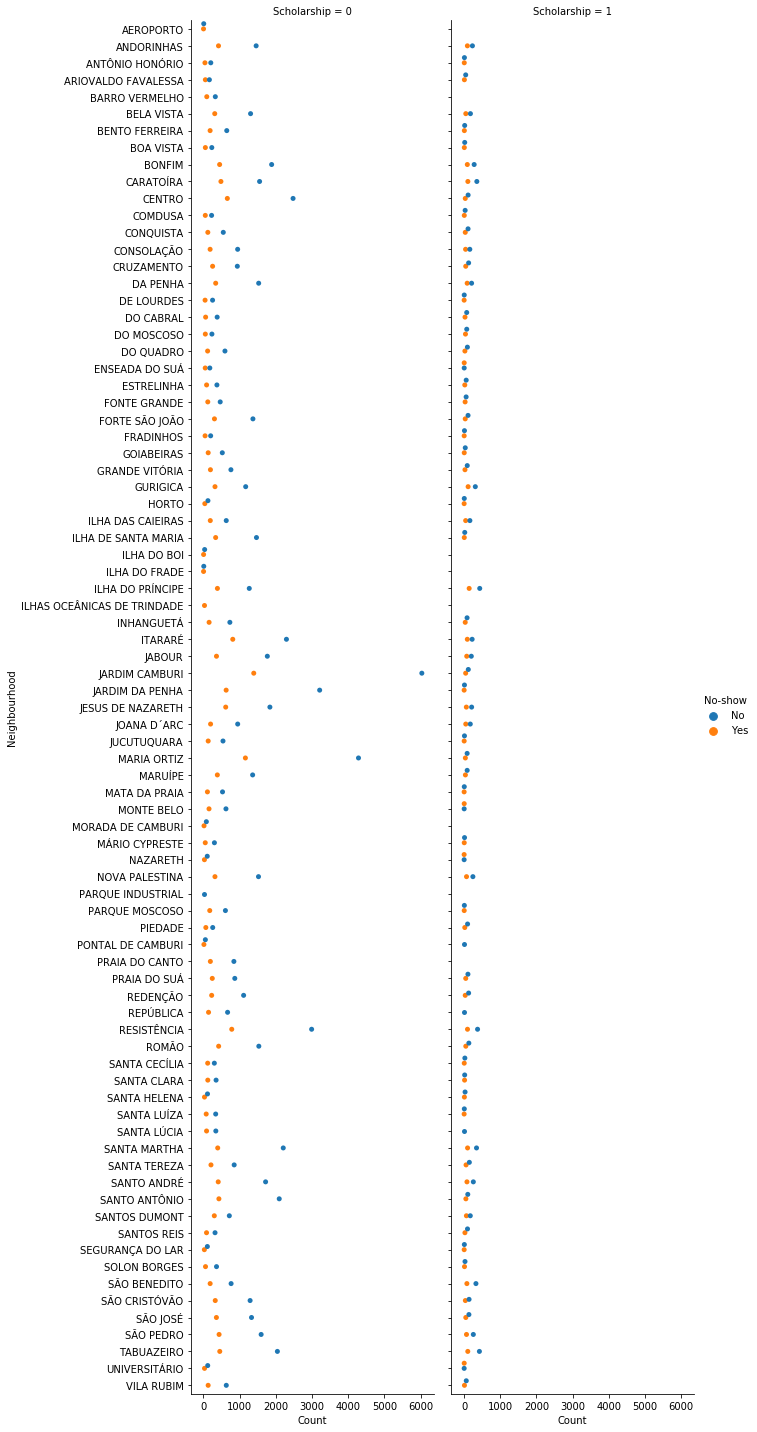

In [ ]:
# visualise showing up based on Neighbourhood vs Scholarship
nbrhd_schlrshp_nshw['Neighbourhood'] = nbrhd_schlrshp_nshw['Neighbourhood'].apply(lambda x: x)
sns.catplot(x = 'Count', y = 'Neighbourhood', hue = 'No-show', data = nbrhd_schlrshp_nshw, col = 'Scholarship', kind = 'swarm', height = 20, aspect = 0.25)

In [ ]:
# which factors can help to predict the showing up of a patient?
# first, let's look at how much each independent variable correlates with No-show (dependent variable)
from IPython import display
df['No-show'] = pd.get_dummies(df['No-show'])
independent_variables = ['SMS_received', 'Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'Handcap']
for variable in independent_variables :
    display.display(df.groupby(variable)['No-show'].mean())

SMS_received
0    0.832714
1    0.723347
Name: No-show, dtype: float64

Scholarship
0    0.801307
1    0.762143
Name: No-show, dtype: float64

Hipertension
0    0.789746
1    0.827092
Name: No-show, dtype: float64

Alcoholism
0    0.797310
1    0.798512
Name: No-show, dtype: float64

Diabetes
0    0.795523
1    0.820118
Name: No-show, dtype: float64

Handcap
0    0.796873
1    0.822310
2    0.796703
3    0.769231
4    0.666667
Name: No-show, dtype: float64

The characteristics that show the highest correlation with showing up for the appointments are SMS_received and 4th handicap

# Machine Learning

## How to predict whether or not the patient will show up for an appointment?

**Training set  —** a subset to train a model.<br>
**Test set —** a subset to test the trained model.<br>

Logistic Regression, K-Nearest Neighbors will be implemented, in order to determine the effectiveness of the models in no-show prediction, f1-tests will be calculated..

In [ ]:
# converting categorical data to numerical data
df['Gender'] = pd.get_dummies(df['Gender'])

le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

le = preprocessing.LabelEncoder()
df['ScheduledDay'] = le.fit_transform(df['ScheduledDay'])

le = preprocessing.LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

le = preprocessing.LabelEncoder()
df['AppointmentDay'] = le.fit_transform(df['AppointmentDay'])

In [ ]:
df['ScheduledDay']

0         26688
1         26466
2         26494
3         26655
4         26460
5         19310
6         20560
7         20667
8         23995
9         20087
10        20524
11        17211
12        22159
13        22806
14        21852
15        17224
16        21592
17        21694
18        17739
19        25220
20        19103
21        19806
22        16029
23        21938
24        26030
25        18349
26        26031
27        19811
28        26404
29        26269
          ...  
110496    97147
110497    88860
110498    99622
110499    88836
110500    99529
110501    88994
110502    99698
110503    89457
110504    99721
110505    89124
110506    89233
110508    88820
110509    99378
110510    88792
110511    99373
110512    99242
110513    99119
110514    99316
110515    97005
110516    97497
110517    97465
110518    20588
110519    20616
110520    31261
110521    31550
110522    31943
110523    30996
110524    20707
110525    20574
110526    20205
Name: ScheduledDay, Leng

In [ ]:
# split data
features = ['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

# Logistic Regression Model

In [ ]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
lr_conf_mat = confusion_matrix(y_test, lr_y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

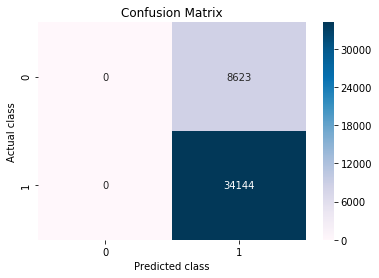

In [ ]:
sns.heatmap(lr_conf_mat, cmap='PuBu', annot=True, fmt='d')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [ ]:
metrics.accuracy_score(y_test, lr_y_pred)

0.7983725769869292

# K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_y_pred = knn.predict(X_test)
knn_conf_mat = confusion_matrix(y_test, knn_y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

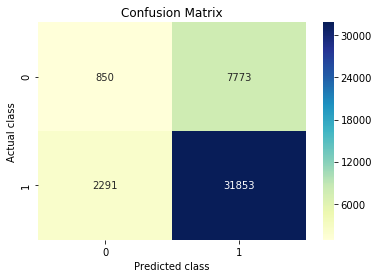

In [ ]:
sns.heatmap(knn_conf_mat, cmap='YlGnBu', annot=True, fmt='d')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [ ]:
#Score
metrics.accuracy_score(y_test, knn_y_pred)

0.7646783735122875

In [ ]:
error = []
# calculating error for K values between 1 and 50
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

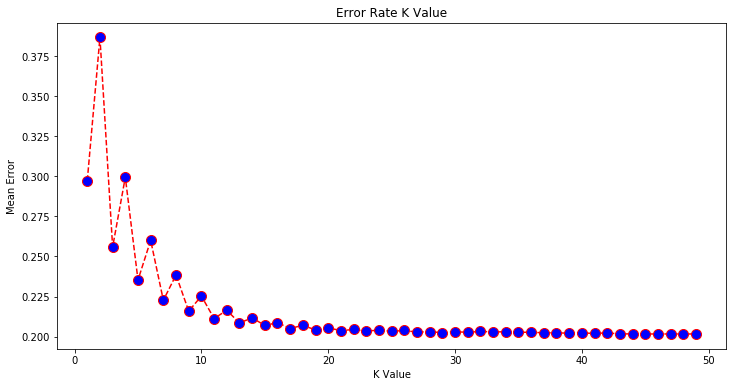

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

From the output we can see that the mean error is the smallest when the values of k is more than 20!

# SVM

In [ ]:
#clf =SVC(gamma='scale')
clf=SVC(kernel ='linear', C = 1,random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
sv_y_pred=clf.predict(X_test)

In [ ]:
sv_y_pred

In [ ]:
sv_conf_mat = confusion_matrix(y_test, sv_y_pred)

In [ ]:
sv_conf_mat

In [ ]:
sns.heatmap(sv_conf_mat, cmap='YlGnBu', annot=True, fmt='d')

In [ ]:
X_set,y_set=X_test,y_test

In [ ]:
X1,X2=np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start= X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM(test set)')
plt.xlabel('Patient')
plt.ylabel('Status')
plt.legend()
plt.show()